## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [ ]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [ ]:
url = 'https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv'
data = pd.read_csv(url)
data

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad


In [ ]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [ ]:
data.isna().sum()

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

ни в одном из столбцов нет пропусков

отдельно напечатаем все имеющиеся признаки

In [ ]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [ ]:
data.status.unique()

array(['no checking account', '... < 0 DM',
       '... >= 200 DM / salary for at least 1 year', '0<= ... < 200 DM'],
      dtype=object)

In [ ]:
data.installment_rate.unique()

array(['< 20', '25 <= ... < 35', '20 <= ... < 25', '>= 35'], dtype=object)

In [ ]:
data.present_residence.unique()

array(['>= 7 yrs', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '< 1 yr'],
      dtype=object)

In [ ]:
data.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [ ]:
data.people_liable.unique()

array(['0 to 2', '3 or more'], dtype=object)

In [ ]:
data.telephone.unique()

array(['no', 'yes (under customer name)'], dtype=object)

**признаки:**

- количественные (имеют числовое выражение, в теории могут принимать любое значение, хоть 0, хоть 32929838392, хоть 23767,3827):
  - duration
  - amount
  - age


- бинарные (они принимают только два значения, которые как бы являются противоположными, полярными, которые также нельзя сравнить между собой как больше/меньше, лучше/хуже)
  - telephone (no/yes (under customer name)
  - foreign_worker (no/yes)
  - credit_risk (bad/good)

- порядковые (их можно упорядочить, сравнить между собой)
  - employment_duration (продолжительность трудоустройства у человека, работающего менее 1 года (... < 1 year), очевидно, больше чем у незанятого (unemployed), и меньше чем у того, кто работает 7 и более лет (... >= 7 years)
  - installment_rate (ставка составляет больший процент от располагаемого дохода в значении '25 <= ... < 35', чем в значении '20 <= ... < 25', и меньший, чем в '>= 35'. все эти группы можно объективно выстроить по возрастанию, они не будут пересекаться)
  - present_residence (можно сказать, что период проживания 7 и более лет (>= 7 yrs) объективно больше, чем период проживания менее 1 года (< 1 yr))
  - number_credits (значения тоже составляют группы, которые можно упорядочить, сравнить между собо:'1', '2-3', '4-5', '>= 6')
  - people_liable (несмотря на то что здесь может быть только 2 значения '0 to 2' и '3 or more', хочу отнести это к порядковым, а не бинарным, тк, как и в других порядковых признаках, эти значения можно сравнивать. кроме того, они не особо противоположные, как да/нет - формулировка значений не "есть ответственные лица/нет ответственных лиц).

- категориальные (у всех этих признаков > 2 значений, которые нельзя сравнить между собой как больше/меньше, внутри групп просто существуют разные "равноправные" значения): 
  - status (несмотря на то что он похож на признаки, ранее отнесенные к порядковым, статус не такой однозначный. он показывает размер счета, однако счет может быть отрицательным (... < 0 DM), его может не быть вообще (no checking account), может равняться 0 (0 <= ... < 200 DM), а может быть вообще размера '...>= 200 DM/salary for at least 1 year'. и не оч хорошо представляется, как объективно сравнивать эти значения между собой. отрицательный баланс меньше no checking account? если обозначить no checking account условно за 0, то тогда непонятно, что делать с '0 <= ... < 200 DM', где 0 тоже может быть равно. в общем непонятный признак, объективно отсортировать нельзя, просто категориальный)
  - credit_history
  - purpose
  - savings
  - personal_status_sex
  - other_debtors
  - property
  - other_installment_plans
  - housing
  - job 

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [ ]:
data.groupby(['purpose'], as_index=False)['amount'].mean()

,purpose,amount
0,business,8209.333333
1,car (new),5370.223301
2,car (used),3066.983425
3,domestic appliances,2728.090909
4,furniture/equipment,2487.685714
5,others,3062.948718
6,radio/television,1498.000000
7,repairs,3180.400000
8,retraining,4158.041237
9,vacation,1205.888889


всего выделяется 9 категорий, на обеспечение которых люди берут кредиты. 

наибольшая средняя сумма кредита наблюдается у категории бизнес (business), наименьшая - у категории отпуск (vacation)

### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [ ]:
age_data = data[data['age'] < 30]
age_rent_data = age_data[age_data['housing'] == 'rent']
res = (len(age_rent_data) / len(age_data) * 100)
print(f'{round(res, 2)}% клиентов моложе 30 лет снимает жилье')

66.67% клиентов моложе 30 лет снимает жилье


In [ ]:
age_data = data[data['age'] > 40]
age_rent_data = age_data[age_data['housing'] == 'rent']
res = (len(age_rent_data) / len(age_data) * 100)
print(f'{round(res, 2)}% клиентов старше 40 лет снимает жилье')

68.01% клиентов старше 40 лет снимает жилье


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [ ]:
foreigners = data[
            ((data['foreign_worker'] == 'yes')) & 
            ((data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6'))
                  ]
len(foreigners)

1

то есть только один иностранец имеет больше 3 кредитов

### Задание 6 (1 балл)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.rcParams["figure.figsize"] = (15, 5)  # зададим размер графиков сразу на весь ноутбук

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

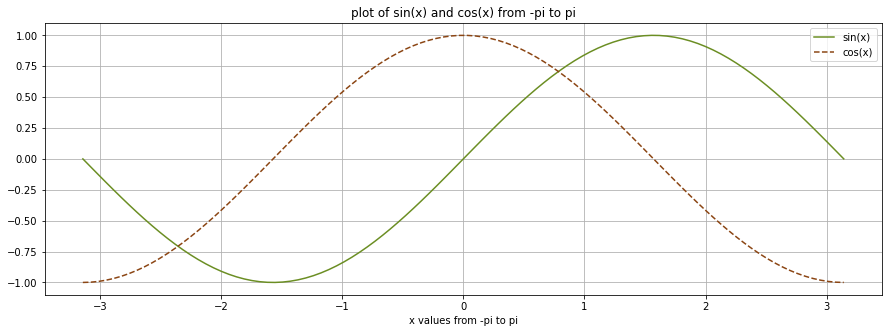

In [ ]:
x = np.linspace(-np.pi, np.pi, 100)  # создаем 100 точек от pi до pi
sin_g = np.sin(x)
cos_g = np.cos(x)

plt.plot(x, sin_g, color='olivedrab')  # ну красота а не цвет..
plt.plot(x, cos_g, color='saddlebrown', linestyle='--')

plt.grid()  # создаем сетку

plt.xlabel('x values from -pi to pi')  # подписываем ось х
plt.title('plot of sin(x) and cos(x) from -pi to pi')  # заголовок целого графика
plt.legend(['sin(x)', 'cos(x)'])  # создаем легенду

plt.show()

### Задание 7 (1 балл)

т.к. в этом и следующих заданиях используются 2 группы объектов: те, у которых credit risk == good, и те, у которых credit risk == bad. заранее запишем их в переменные, чтобы было удобнее.

In [ ]:
good = data[data['credit_risk'] == 'good']
bad = data[data['credit_risk'] == 'bad']

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

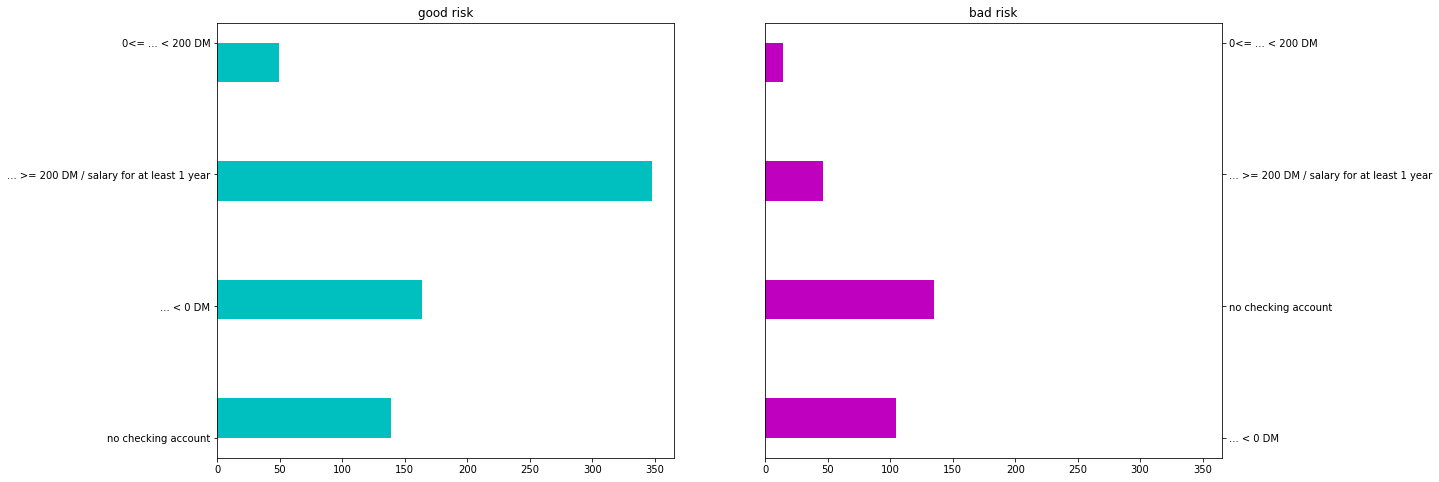

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(18, 8), sharex=True)  # создаем основу для графиков, которые будут расположены в 1 строчке и 2 отдельных столбцах

axs[0].set_title("good risk")
axs[0].hist(good['status'], orientation='horizontal', color='c')

axs[1].set_title('bad risk')
axs[1].hist(bad['status'], orientation='horizontal', color='m')
axs[1].yaxis.tick_right()  # перемещаем подписи с оси у графика bad risk направо 

plt.show()


### Задание 8  (0.5 балла)

In [ ]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

<AxesSubplot:xlabel='savings', ylabel='Count'>

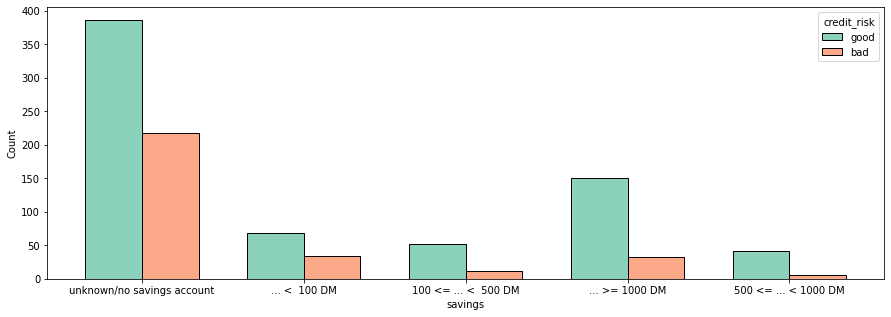

In [ ]:
sns.histplot(data, x="savings", hue="credit_risk",   # выбираем признаки
             multiple="dodge",  # делаем так, чтобы бары не накладывались друг на друга, а стояли рядом 
             shrink=.7,  # задаем расстояние между столбцами разных категорий, чтобы они не сливались
             palette='Set2')  # красиво раскрашиваем

при любом размере сберегательного счета больше положительных кейсов, однако есть явная тенденция того, что чем больше размер счета, тем выше уровень положит. кейсов по сравнению с отрицательными. 

в случаях когда сбер. счета нет/нет информации, отриц. кейсы составляют больше половины положительных. когда сбер. счет просто маленький, т.е. на нем меньше 100DM, тогда отриц. кейсы сост. около половины. при бОльших размерах счета кол-во положит. кейсы превышает отрицательные более, чем в 2 раза.

построение графика с помощью seaborn гораздо приятнее... меньше кода, достаточно легко найти информацию о том, как что-то изменить на графике, есть однозначность (при поиске инфы про mathplotlib сложилось впечатление, что существует 999999 способов сделать одну и ту же вещь, но ни один не является удобным). и графики этого модуля лучше читаемы, лаконичные!

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

<AxesSubplot:xlabel='savings', ylabel='age'>

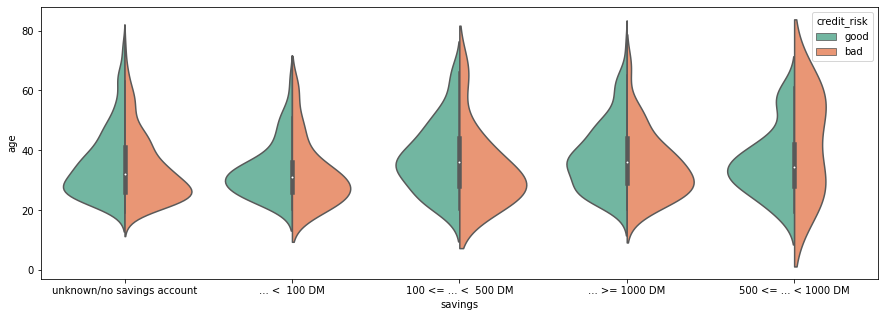

In [ ]:
sns.violinplot(data=data, x='savings', y='age', hue='credit_risk',  # выбираем признаки
               split=True,  # располагаем скрипичные диаграммы каждой отдельной категории так, 
                            # чтобы распределение по credit risk рисовалось для положительных и отрицательных кейсов по одному разу
               palette='Set2')  # красиво раскрашиваем

медианный возраст для каждого размера сберегательного счета примерно одинаковый - около 30 лет.

при любом размере сберегательного счета распределение отрицательных и положительных кейсов примерно одинаково.
в качестве исключения можно только выделить категорию '500 <= ... < 1000 DM'. здесь в промежутке от 20 до примерно 50 лет наблюдалось больше положительных кейсов, нежели отрицательных. от 50 лет отрицательные кейсы уже превышали положительные

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

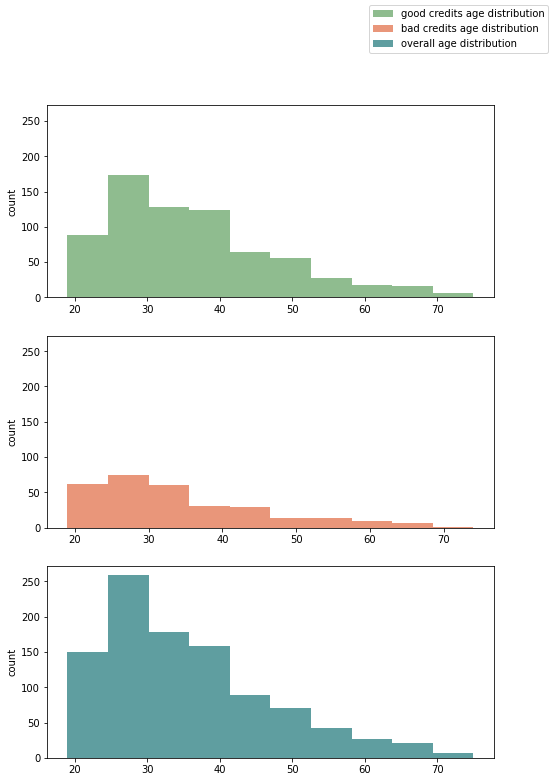

In [ ]:
fig, axs = plt.subplots(3, 1,  # создаем основу для графиков, которые будут расположены в один столбик в 3 отдельных строках
                        figsize=(8, 12),  # мы изначально задавали размер на весь ноутбук, но тут он не очень подходит, поэтому меняем
                        sharey=True)  # делаем так, чтобы гистограммы имели одинаковую ось у

axs[0].hist(x=good['age'], color='darkseagreen')

axs[1].hist(x=bad['age'], color='darksalmon')

axs[2].hist(x=data['age'], color='cadetblue')

for ax in axs: 
  ax.set(ylabel='count')  # подписываем ось y у каждой гистограммы

plt.figlegend(['good credits age distribution', 'bad credits age distribution', 'overall age distribution'])  # создаем общую легенду
 
plt.show()

по 3-му графику видно, что бОльшая часть кредитов оформлялась людьми примерно в возрасте от 25 до 30 лет. в этом же возрасте пик положительных кейсов. с увеличением возраста кол-во кредитов снижается, а кол-во положит и отриц кейсов сближается

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

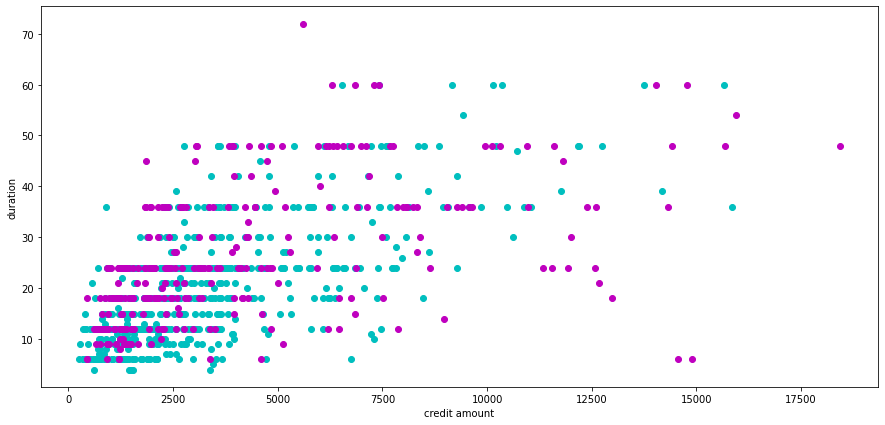

In [ ]:
plt.figure(figsize=(15, 7))

plt.scatter(x=good['amount'], y=good['duration'], color='c')
plt.scatter(x=bad['amount'], y=bad['duration'], color='m')

plt.xlabel('credit amount')  # подписываем ось х
plt.ylabel('duration')  # подписываем ось y

plt.show()

по диаграмме рассеивания не совсем четко, но все же прослеживается тенденция того, что чем больше сумма кредита, тем больше его продолжительность (т.е. тем дольше он выплачивается).

бОльшее число кредитов берется размером до 5000 (DM? deutsche mark?) на период примерно от 5 до 25 лет.

в кредитах на большую сумму (примерно от 10000) чаще отказывают (в этой области в основном фиолетовые точки) 

единичные случаи, когда брались кредиты продолжительностью более 50 лет. в основном максимальная продолжительность 60 лет, хотя есть одно исключение - попытка взять кредит на +70 лет, но кейс отрицательный

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

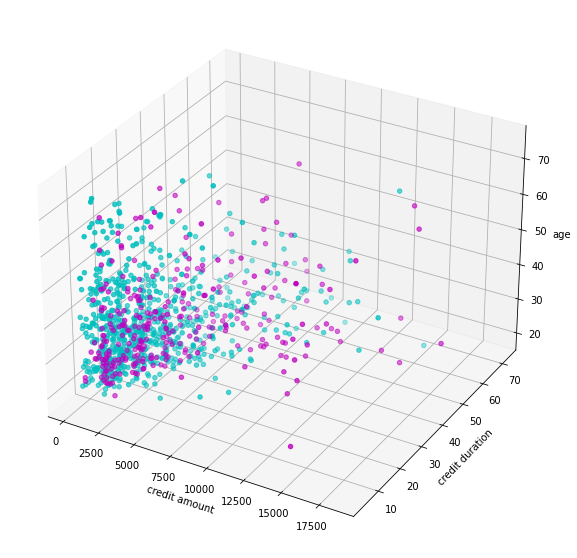

In [ ]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

ax.scatter(good['amount'], good['duration'], good['age'], c='c')
ax.scatter(bad['amount'], bad['duration'], bad['age'], c='m')

ax.set_xlabel('credit amount')
ax.set_ylabel('credit duration')
ax.set_zlabel('age')

plt.show()

видим, что больше всего кредитов, когда их размер до 2500 DM, он длительностью от 10 до 50 лет, а возраст заемщика до 40 лет.

также видно, что голубые точки более плотно заполняют пространство, поэтому можно предположительно сказать, что положительных кейсов больше


### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [ ]:
categorical_features = ['status', 'credit_history', 'purpose', 'savings',
                        'personal_status_sex', 'other_debtors', 'property',
                        'other_installment_plans', 'housing', 'job']
                        
new_data = data.drop(columns=categorical_features)  # убираю все столбики, содержашие категориальные признаки
new_data.head()

,duration,amount,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,< 1 yr,< 20,>= 7 yrs,21,1,0 to 2,no,no,good
1,9,2799,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,36,2-3,3 or more,no,no,good
2,12,841,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,23,1,0 to 2,no,no,good
3,12,2122,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,39,2-3,3 or more,no,yes,good
4,12,2171,1 <= ... < 4 yrs,< 20,>= 7 yrs,38,2-3,0 to 2,no,yes,good


теперь будем разбираться с порядковыми и бинарными.

In [ ]:
data.employment_duration.unique()

array(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', 'unemployed',
       '>= 7 yrs'], dtype=object)

In [ ]:
data.installment_rate.unique()

array(['< 20', '25 <= ... < 35', '20 <= ... < 25', '>= 35'], dtype=object)

In [ ]:
data.present_residence.unique()

array(['>= 7 yrs', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '< 1 yr'],
      dtype=object)

In [ ]:
data.number_credits.unique()

array(['1', '2-3', '4-5', '>= 6'], dtype=object)

In [ ]:
data.people_liable.unique()

array(['0 to 2', '3 or more'], dtype=object)

In [ ]:
data.telephone.unique()

array(['no', 'yes (under customer name)'], dtype=object)

In [ ]:
# для каждого порядкового/бинарного признака создаем словарь, в котором каждому уникальному
# значению этого признака присваиваем число.
# тк эти виды признаков можно условно упорядочить, присваиваем числа также упорядоченно:
# "наименьшее" значение - 0, побольше - 1 и тд

encoded = {'employment_duration':
                          {'< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, 'unemployed': 0, '>= 7 yrs': 4},
           'installment_rate':
                          {'< 20': 0, '25 <= ... < 35': 2, '20 <= ... < 25': 1, '>= 35': 3},
           'present_residence':
                          {'>= 7 yrs': 3, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '< 1 yr': 0},
           'number_credits':
                          {'1': 0, '2-3': 1, '4-5': 2, '>= 6': 3},
           'people_liable': 
                          {'0 to 2': 0, '3 or more': 1},
           'telephone':
                          {'no': 0, 'yes (under customer name)': 1},
           'foreign_worker':
                          {'no': 0, 'yes': 1},
           'credit_risk':
                          {'bad': 0, 'good': 1}
          }

new_data.replace(encoded, inplace=True)
new_data.head()

,duration,amount,employment_duration,installment_rate,present_residence,age,number_credits,people_liable,telephone,foreign_worker,credit_risk
0,18,1049,1,0,3,21,0,0,0,0,1
1,9,2799,2,2,1,36,1,1,0,0,1
2,12,841,3,2,3,23,0,0,0,0,1
3,12,2122,2,1,1,39,1,1,0,1,1
4,12,2171,2,0,3,38,1,0,0,1,1


### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [ ]:
def predict(Xtest: np.array) -> np.array:
  res = np.empty((0, 1), int)  # создаем пустой массив

  for object in Xtest:
    res = np.append(res, np.array([[1]]), axis=0)  # для каждого объекта предсказываем рез-т единичку :)
    # duration, amount, employment_d, installment_r, pres_residence, age, num_credits, people_liable, phone, foreign = object[:]
  return res 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = new_data.drop('credit_risk', 1).values
y = new_data['credit_risk'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

<ipython-input-35-5d30bd6d1f0d>:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = new_data.drop('credit_risk', 1).values


0.66